In [183]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
          'figure.figsize': (12, 16),
          'figure.titlesize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'lines.markersize': 10
          }
pylab.rcParams.update(params)

(-0.5, 629.5, 1199.5, -0.5)

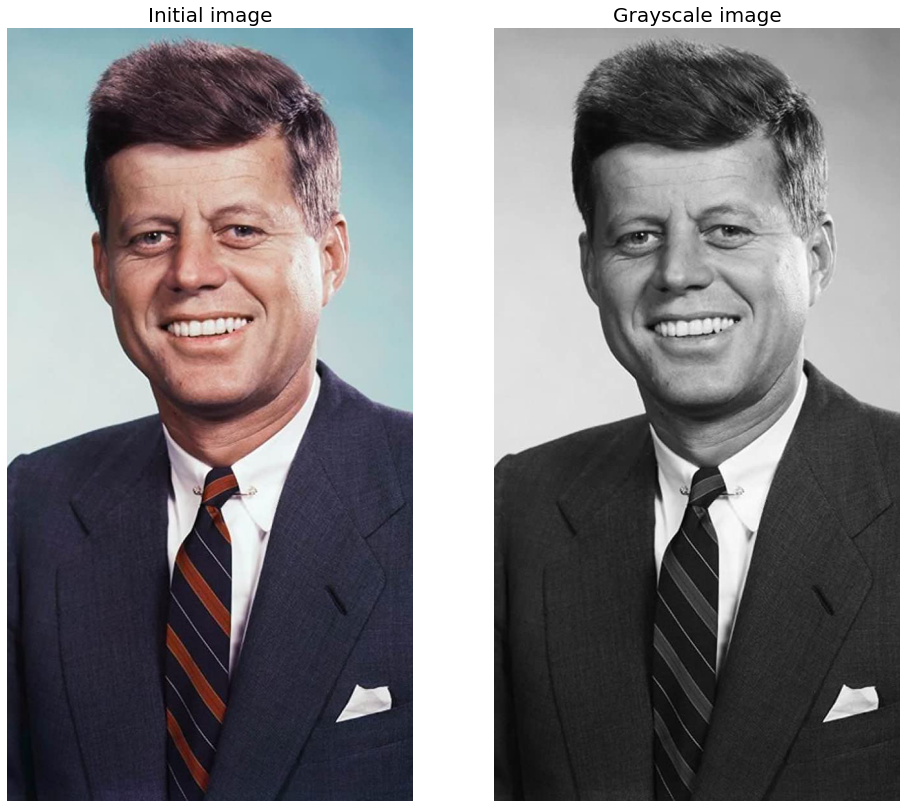

In [12]:
import matplotlib.pyplot as plt
from skimage import io, color

fig,ax=plt.subplots(nrows = 1, ncols = 2)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)

img = io.imread('images/jfk.jpg')

ax[0].imshow(img)
ax[0].set_title('Initial image', fontsize=20)
ax[0].axis('off')

img = color.rgb2gray(img)

ax[1].imshow(img, cmap=plt.cm.gray)
ax[1].set_title('Grayscale image', fontsize=20)
ax[1].axis('off')

Text(0.5, 1.0, 'active_contour(alpha=0.0015, beta=10, gamma=0.001)')

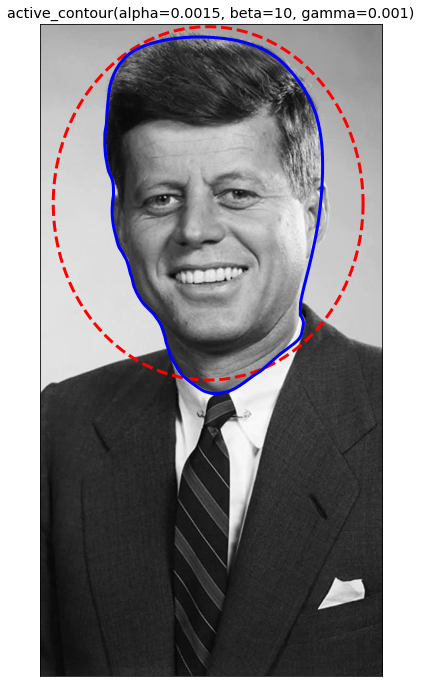

In [137]:
import numpy as np
from skimage.filters import gaussian
from skimage.segmentation import active_contour
s = np.linspace(0, 2*np.pi, 800)
r = 330 + 325*np.sin(s)
c = 310 + 285 * np.cos (s)
init = np.array([r, c]).T
snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=0.0015, beta=10, gamma=0.001)
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
ax.set_title('active_contour(alpha=0.0015, beta=10, gamma=0.001)')

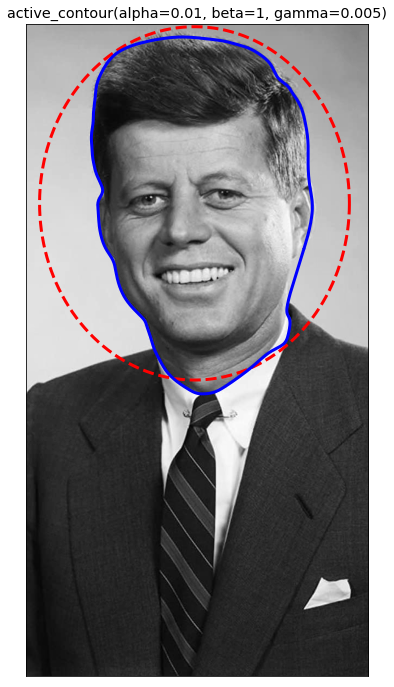

In [136]:
import numpy as np
from skimage.filters import gaussian
from skimage.segmentation import active_contour
s = np.linspace(0, 2*np.pi, 800)
r = 330 + 325*np.sin(s)
c = 310 + 285 * np.cos (s)
init = np.array([r, c]).T
snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=0.01, beta=1, gamma=0.005)
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
ax.set_title('active_contour(alpha=0.01, beta=1, gamma=0.005)')
plt.show()

In [138]:
def circle_points(resolution, center, radius):
    """Generate points defining a circle on an image."""
    radians = np.linspace(0, 2*np.pi, resolution)

    c = center[1] + radius*np.cos(radians)
    r = center[0] + radius*np.sin(radians)

    return np.array([c, r]).T

In [146]:
def image_show(image, nrows=1, ncols=1, cmap='gray', **kwargs):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

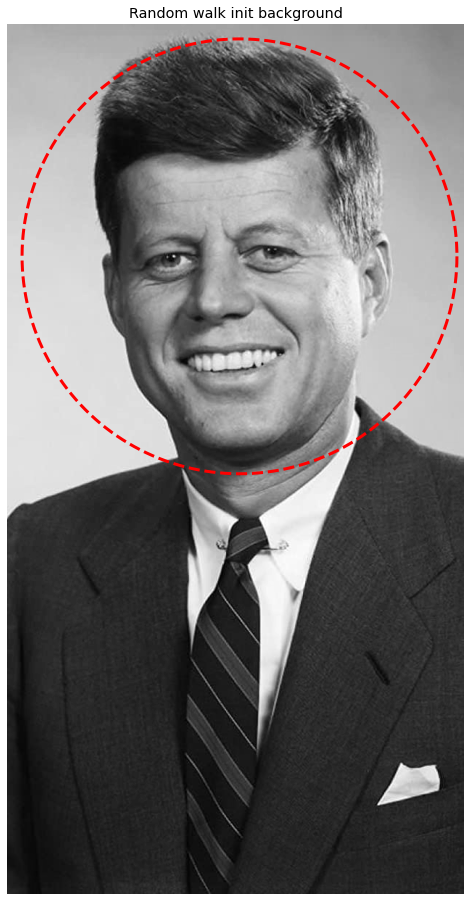

C:\Users\Vonej\AppData\Local\Temp/ipykernel_8804/1900050801.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image_labels[points[:, 1].astype(np.int), points[:,0].astype(np.int)] = 2


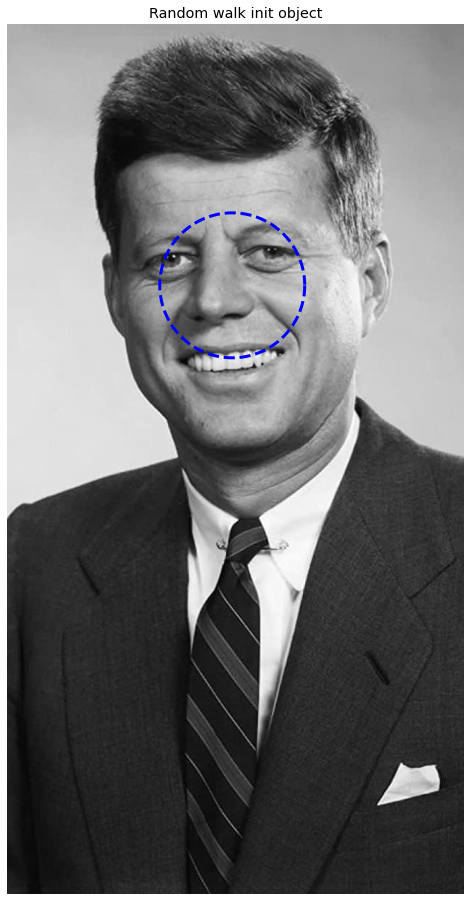

C:\Users\Vonej\AppData\Local\Temp/ipykernel_8804/1900050801.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image_labels[points[:, 1].astype(np.int), points[:,0].astype(np.int)] = 1


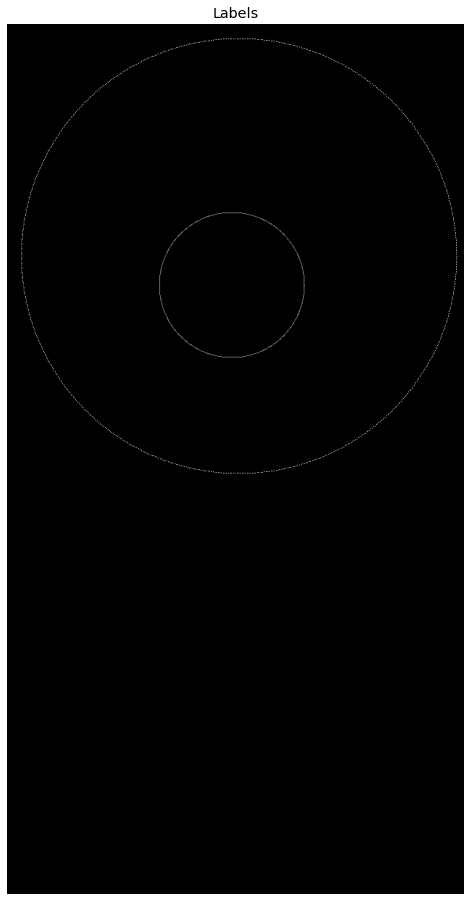

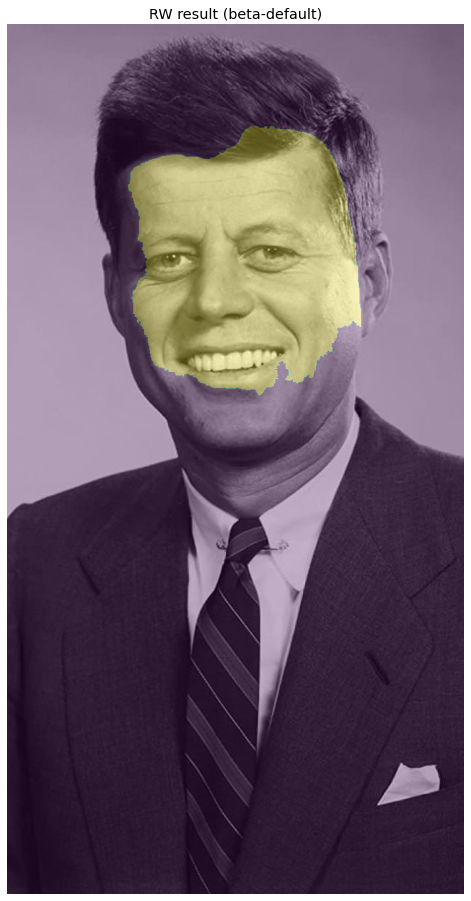

In [189]:
from skimage.segmentation import random_walker
#Обчислення координат x і y точок кола. Оскільки задали resolution
# 800, отримуємо 800 таких точок.
points = circle_points(800, [320, 320], 300)[:-1]
plt.axis('off')
plt.title('Random walk init background')
plt.imshow(img, cmap=plt.cm.gray)
plt.plot(points[:, 0], points[:, 1], '--r', lw=3)
plt.show()
image_labels = np.zeros(img.shape, dtype=np.uint8)
image_labels[points[:, 1].astype(np.int), points[:,0].astype(np.int)] = 2
points = circle_points(800, [410, 310], 150)[:-1]
plt.axis('off')
plt.title('Random walk init object')
plt.imshow(img, cmap=plt.cm.gray)
plt.plot(points[:, 0], points[:, 1], '--b', lw=3)
plt.show()
image_labels[points[:, 1].astype(np.int), points[:,0].astype(np.int)] = 1
plt.axis('off')
plt.title('Labels')
plt.imshow(image_labels, cmap=plt.cm.gray);
plt.show()
image_segmented = random_walker(img, image_labels, mode='bf', beta=1000000)
# Check our results
fig, ax = image_show(img)
plt.axis('off')
ax.set_title('RW result (beta=100000)')
ax.imshow(image_segmented == 1, alpha=0.3);
plt.show()